In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import os # to access mounted files
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("/content/drive/My Drive/colab_files/")
df = pd.read_csv('PCOS_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [7]:
# Drop the 'Sl. No', 'Patient File No.',  'Unnamed: 44' as they seemed unnecessary. Drop rows with null value.
df2 = df.drop(columns = ["Sl. No", "Patient File No.",  "Unnamed: 44"], axis=1)
df2 = df2.dropna(how='all').dropna(how='all', axis=1)
df2.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


<ipython-input-8-c2099e293f65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['PCOS (Y/N)'].sort_values(ascending = False).plot(kind='bar', color= 'blue')


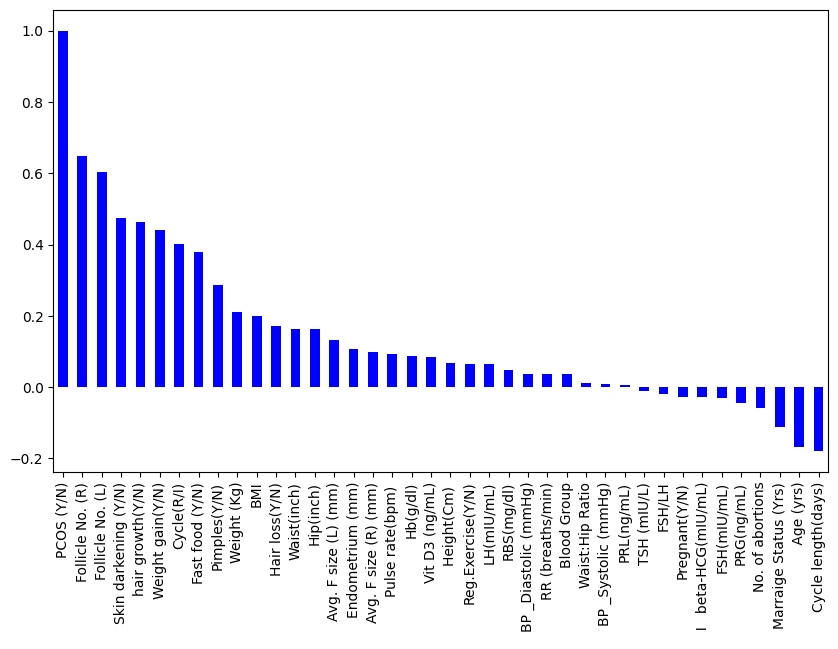

In [8]:
plt.figure(figsize=(10,6))
df2.corr()['PCOS (Y/N)'].sort_values(ascending = False).plot(kind='bar', color= 'blue')
plt.xticks(rotation=90);

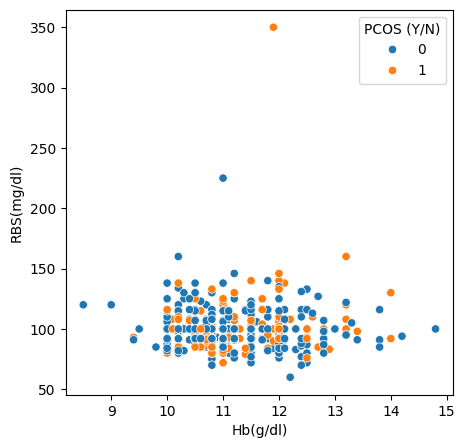

In [9]:
# PCOS has been associated with blood glucose and higher risk of diabetes.
# Look at the measurements to see if this is true within this dataset

plt.figure(figsize=(5,5))
sns.scatterplot(x="Hb(g/dl)", y="RBS(mg/dl)", data=df, hue='PCOS (Y/N)')
plt.show()

NameError: name 'row' is not defined

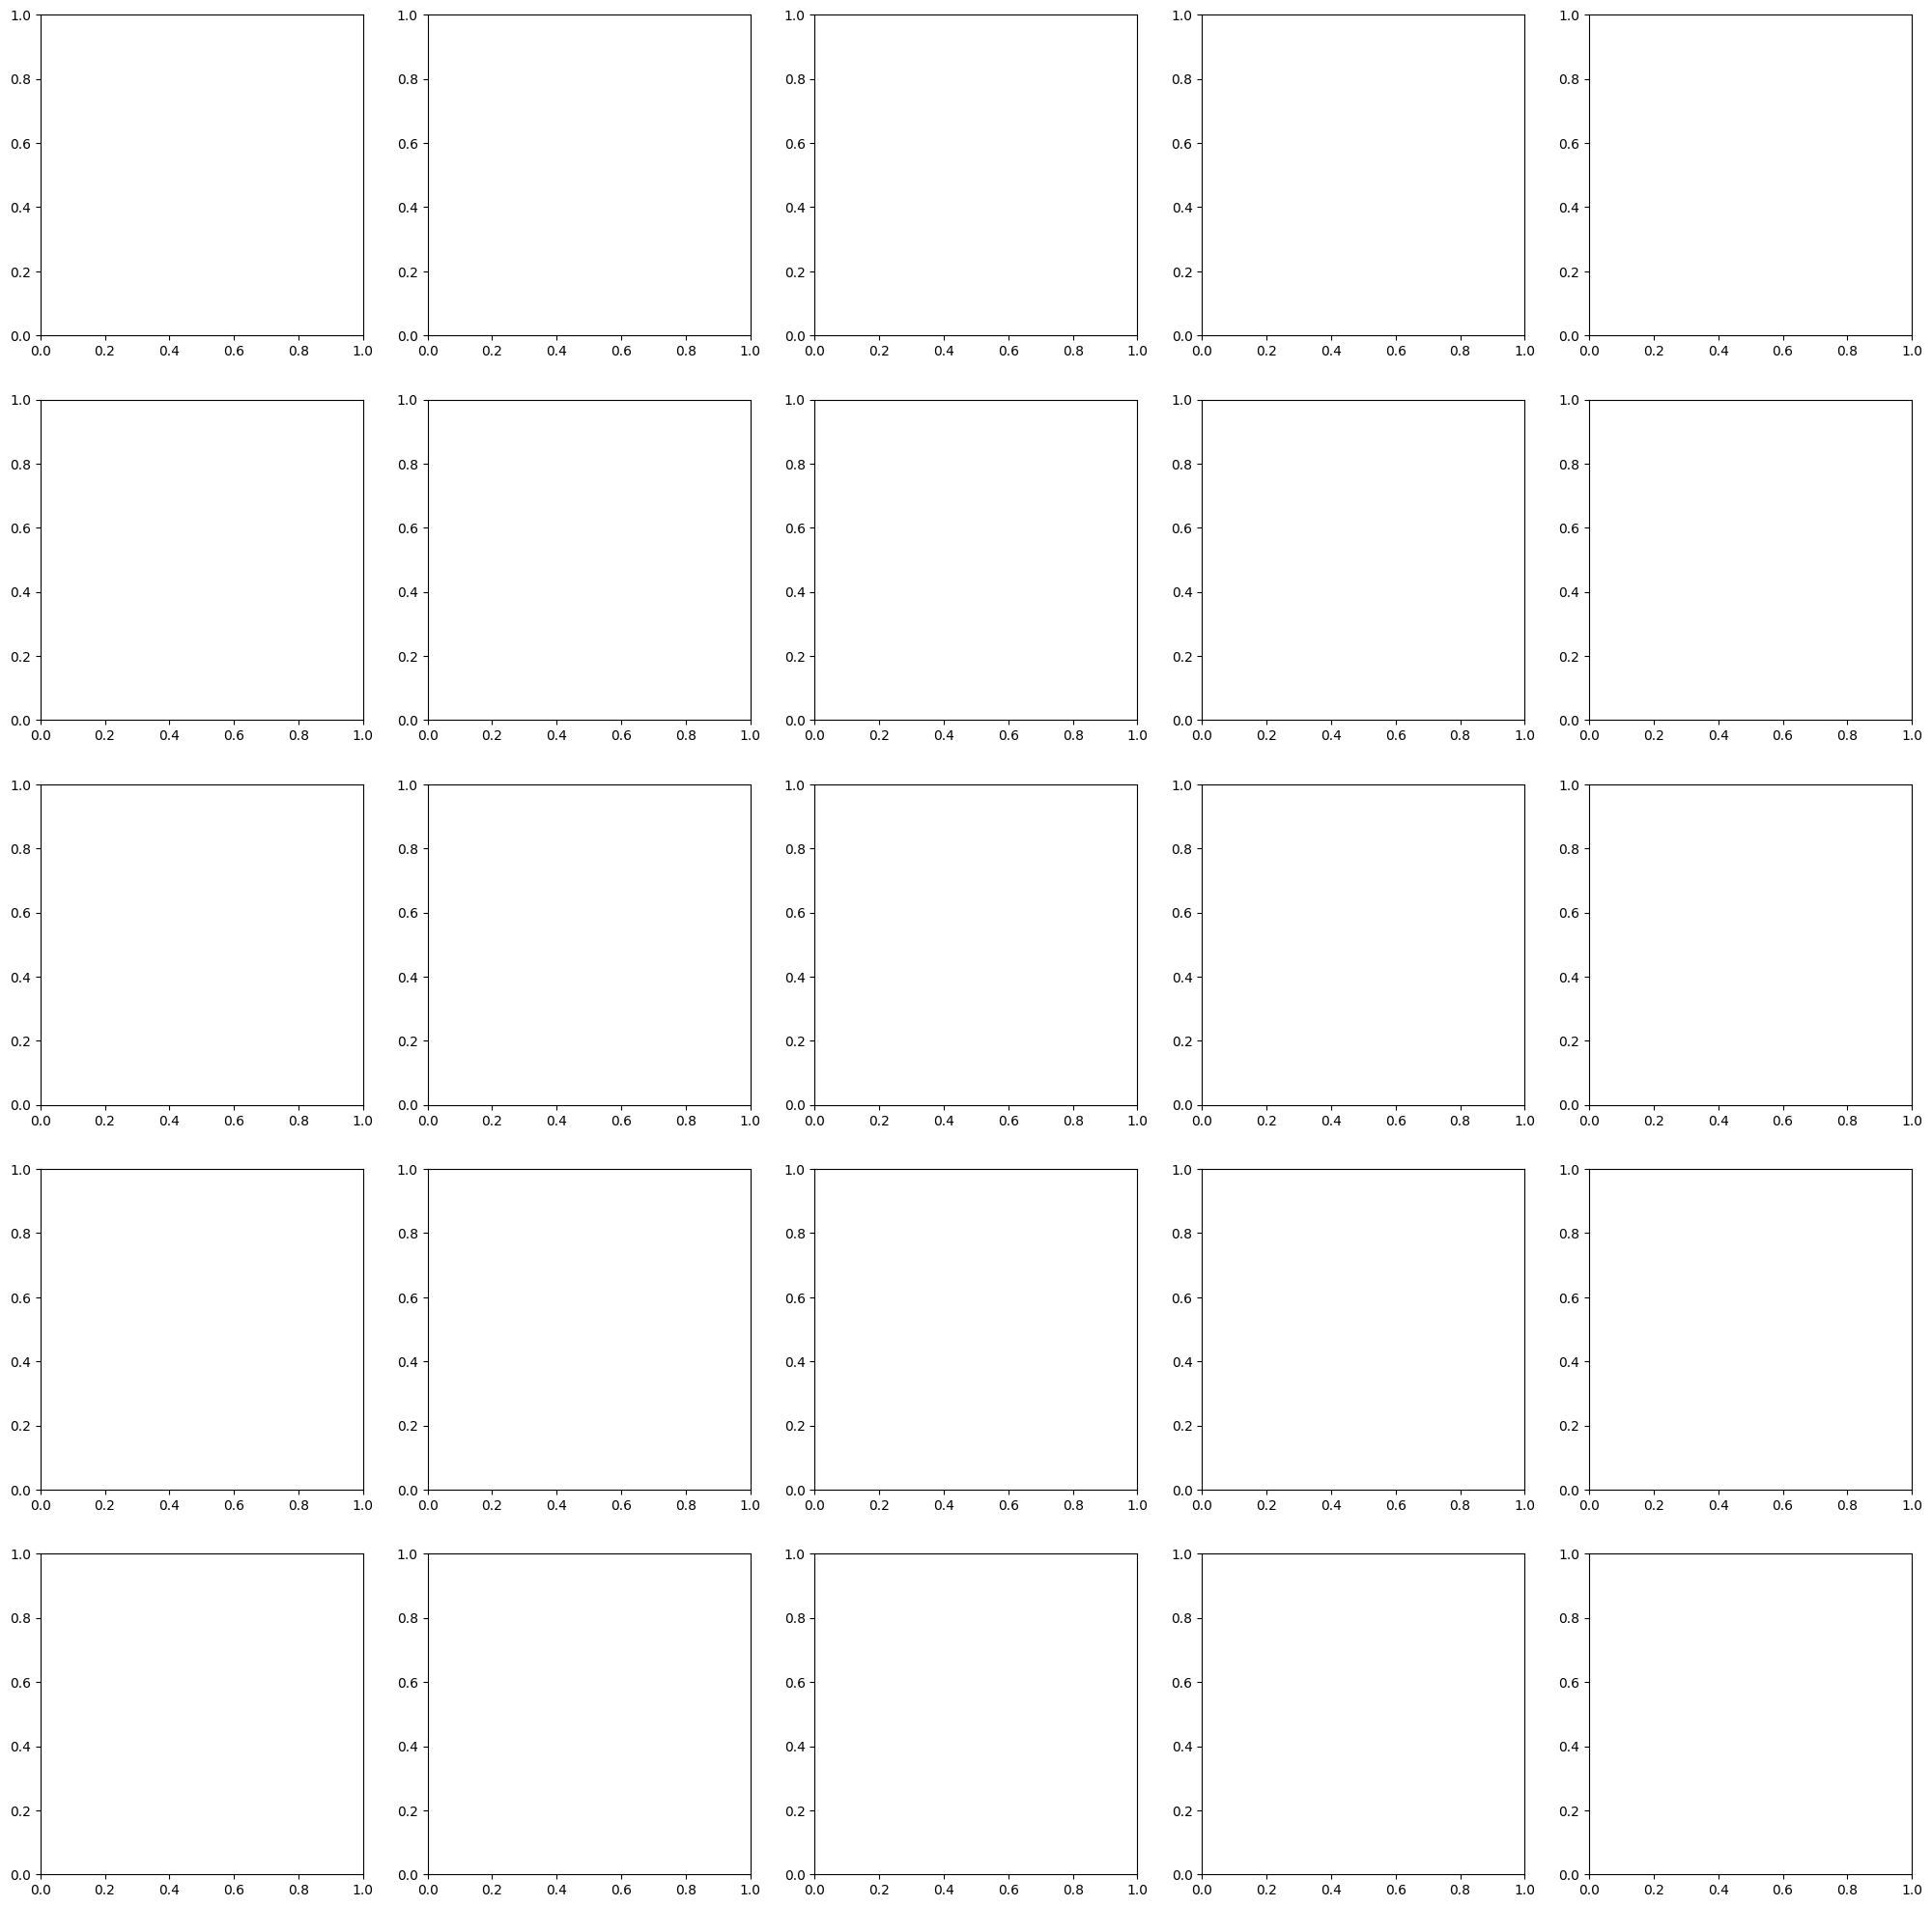

In [10]:
selected_columns = ["BMI", "Cycle length(days)", 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)',
       'Waist(inch)', 'Waist:Hip Ratio']
      #  'TSH (mIU/L)', 'AMH(ng/mL)',
      #  'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)','BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)',
      #  'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
      #  'Avg. F size (R) (mm)', 'Endometrium (mm)']

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))

for i in range(len(selected_columns)):
    # row = i // 5
    # col = i % 5

    sns.kdeplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 0)], color="Lime", fill=True, ax=axes[row, col])
    sns.kdeplot(df[selected_columns[i]][(df['PCOS (Y/N)'] == 1)], color="Blue", fill=True, ax=axes[row, col])

    axes[row, col].legend(["Non PCOS", "PCOS"], loc='upper right')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(selected_columns[i])
    axes[row, col].set_title(f'Distribution of {selected_columns[i]} by PCOS')


plt.tight_layout()
plt.show()